# Plot the Results of SA with $N_\text{tot} =2N_\text{bit}^2 + 1$  and $N_\text{bit} =20$  

In [1]:
from functions_SFMA import *
np.set_printoptions(threshold=10, linewidth=9999)

In [2]:
# Variables of files
n_bit = 20 # number of spins (qubits)
val_dim = f'd{n_bit}'
n_in = n_bit # sizes of the initial datasets 
kFM = int(n_bit/2)-1 # hyperparameter for FM models 
val_k = str(kFM)
val_nonstandard = "nonstandard"
val_standard = "standard"
val_anneal = 'SA'
n_samp = 30 # number of sampling of FMA (SFMA)
val_samp = f'samp{n_samp}'
nrep_it = 2 # number of iterations of SFMA (FMA)
n_it = pow(n_bit,2) # unit of the number of iterations of FMA (SFMA)
n_it_tot = int(n_it*nrep_it) # total number of the iterations
n_tot = n_in + 1 + n_it_tot # sizes of the final datasets
val_n_tot = str(n_tot)
l_rate = n_tot - n_bit # sizes of rates

# Labels and colors for plots
list_label = ["NS-FMA", "NS-SFMA (R=0.4)","S-FMA", "S-SFMA (R=0.4)", "RS"] # labels of the algorithms

list_color = ["green", "orange", "blue", "red", "tan"] # colors for plots

# Specify the folders for saving the figures of the results.
folder_data =  f'final_data_file_{n_bit}' # folder for the inital and output datasets 
folder_mean = f'final_SFMA_results_mean_{n_bit}_SA' # folder for the plots of mean
folder_rate = f'final_SFMA_results_rate_{n_bit}_SA' # folder for the plots of success rate

# font sizes
x_fontsize = 18
y_fontsize = 18
title_fontsize = 18
legend_fontsize = 16

## Plot the results of rounded means

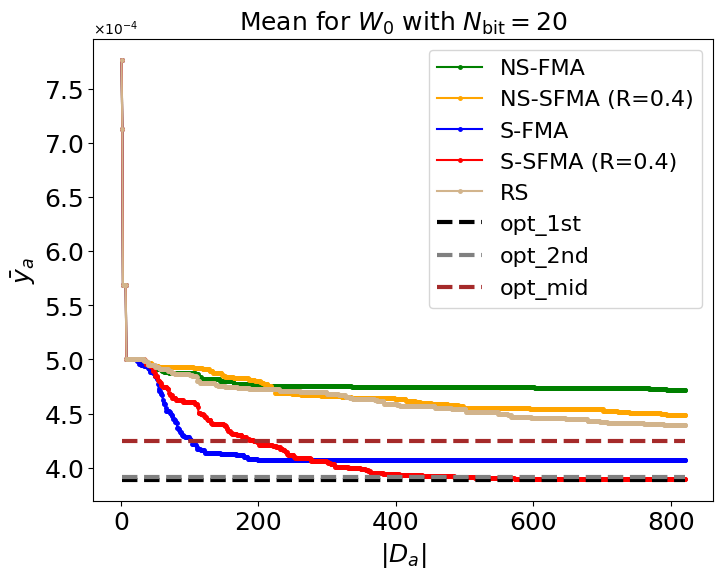

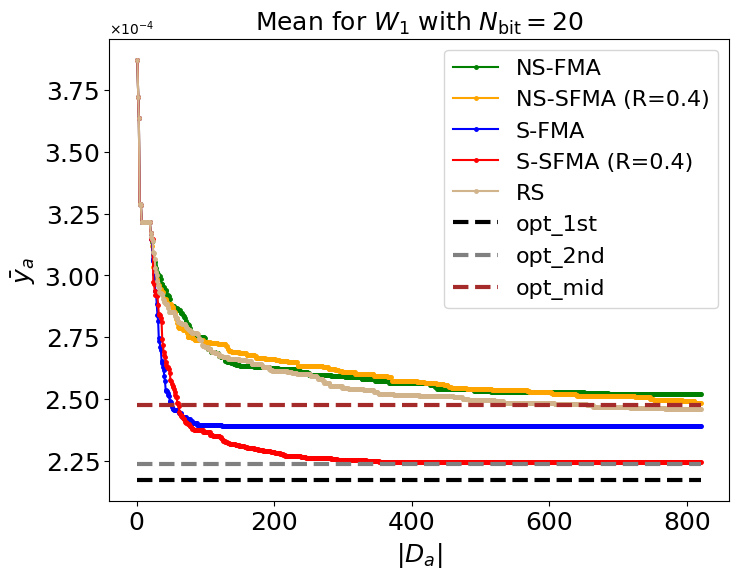

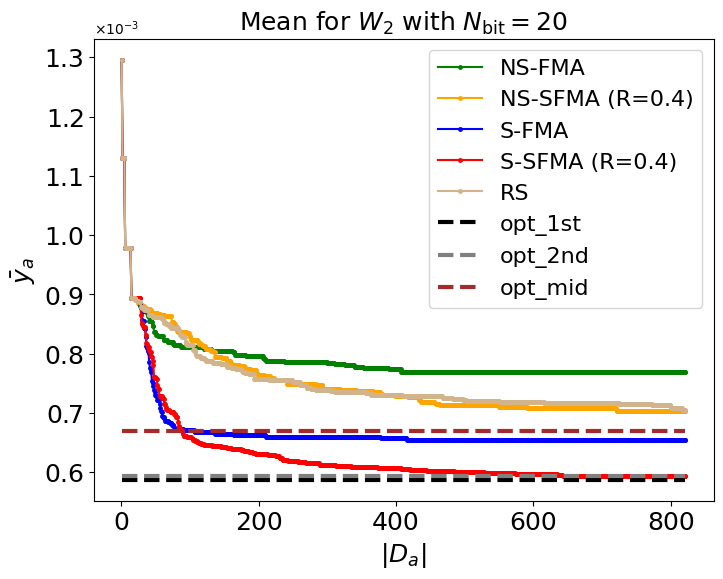

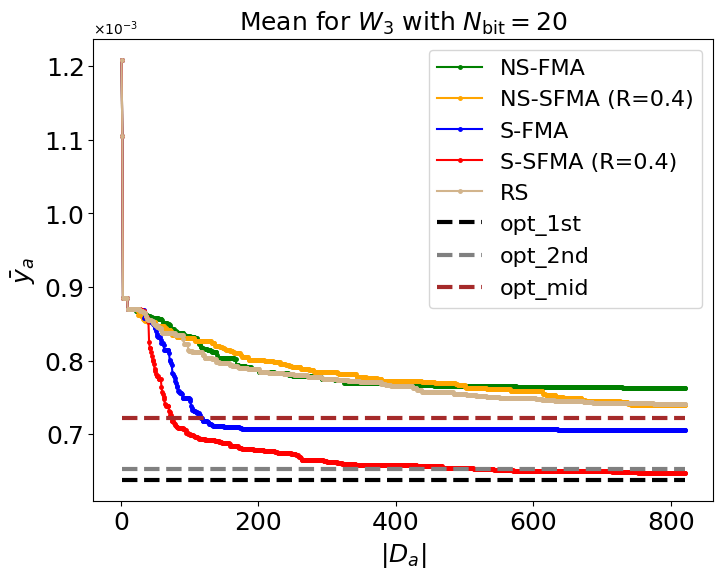

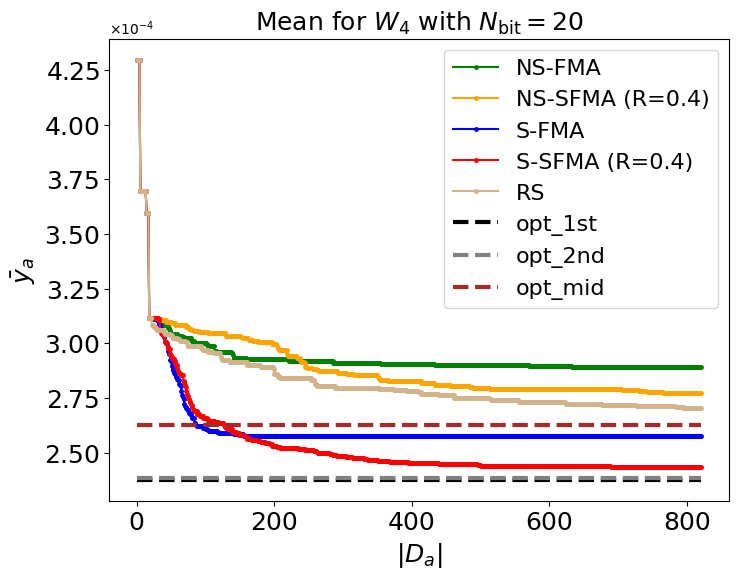

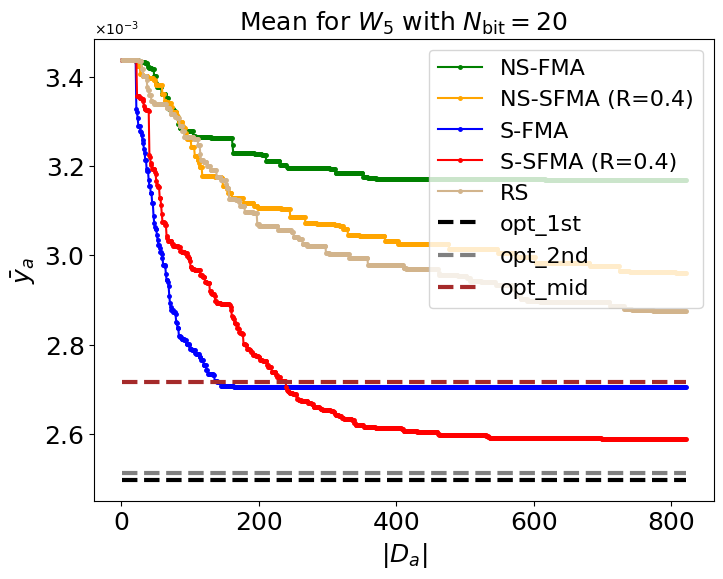

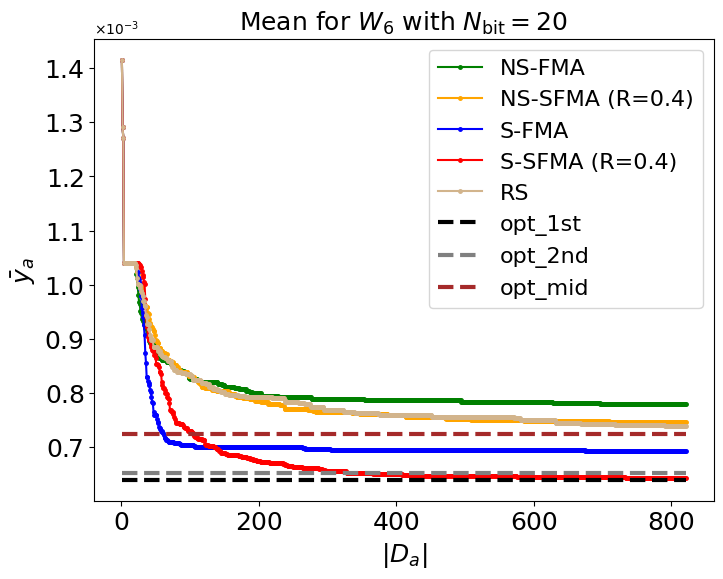

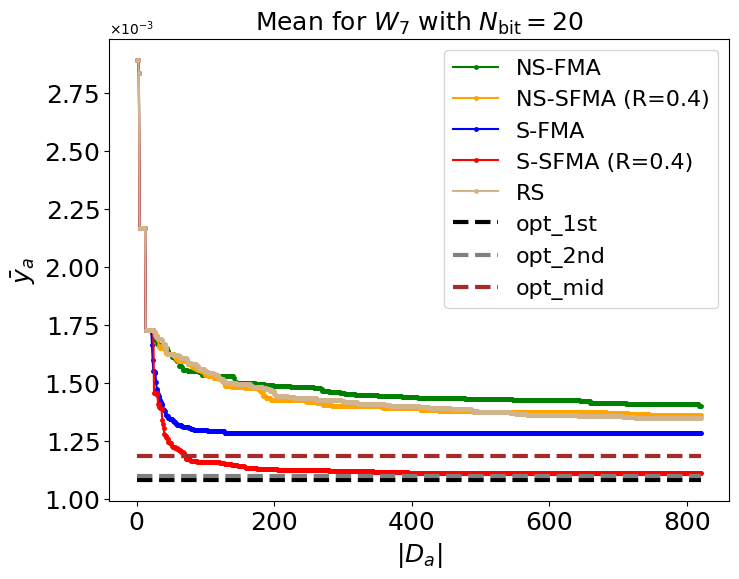

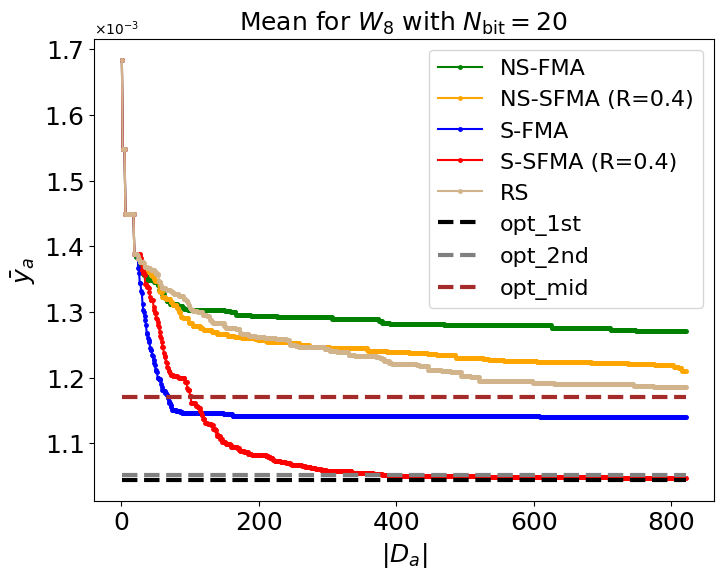

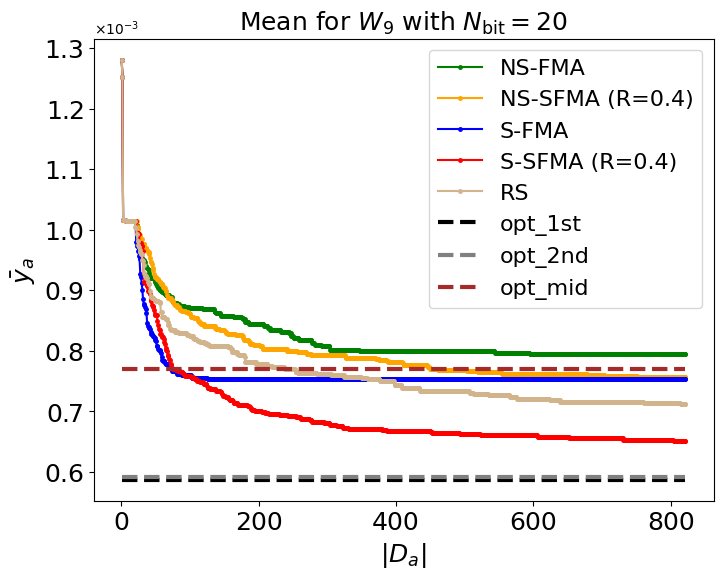

In [3]:
# Load the files and plot the results.
for n_W in range(d_W): # setup for each W matrix
    val_num_W = f'W_{n_W}'
    ######### Load the non-standardized results.
    file_nonstandard =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_nonstandard}.bz2'
    with open(file_nonstandard, 'rb') as fl_nonstandard:
        result_nonstandard = pickle.load(fl_nonstandard)
    ######### Load the standardized results.
    file_standard =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_standard}.bz2'
    with open(file_standard, 'rb') as fl_standard:
        result_standard = pickle.load(fl_standard)
    ######### Load the RS results.
    file_RS =f'{folder_data}/RS_result_{val_num_W}_{val_dim}_{val_n_tot}.bz2'
    with open(file_RS, 'rb') as fl_RS:
        result_RS = pickle.load(fl_RS)
    
    ######### Rounded means (17 decimal places).  
    ys_mean_full_nonstandard = result_nonstandard['ys_mean_full_rounded'] # full, non-standardized 
    ys_mean_sub_nonstandard = result_nonstandard['ys_mean_sub_rounded'] # sampled (R=0.4), non-standardized
    ys_mean_full_standard = result_standard['ys_mean_full_rounded'] # full, standardized 
    ys_mean_sub_standard = result_standard['ys_mean_sub_rounded'] # sampled (R=0.4), standardized
    ys_RS = result_RS['ys_mean_rounded'] # RS
    
    opt_1st = result_standard['opt_1st_rounded'] # rounded opt_1st 
    opt_2nd = result_standard['opt_2nd_rounded'] # rounded opt_2nd 
    opt_mid2 = result_standard['opt_mid2_rounded'] # rounded opt_mid2 

    #### Plot means.
    list_mean = [ys_mean_full_nonstandard,ys_mean_sub_nonstandard,ys_mean_full_standard,ys_mean_sub_standard,ys_RS] # list of means
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    for a in range(len(list_mean)):
        ax.plot(
        range(1, n_tot+1),
        list_mean[a],
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[a],
        color=list_color[a]
        )
    ax.plot(
        range(1, n_tot+1),
        opt_1st,
        linewidth=3,
        linestyle="--",
        label='opt_1st',
        color="black",
        )
    ax.plot(
        range(1, n_tot+1),
        opt_2nd,
        linewidth=3,
        linestyle="--",
        label='opt_2nd',
        color="grey",
        )

    ax.plot(
    range(1, n_tot+1),
    opt_mid2,
    linewidth=3,
    linestyle="--",
    label='opt_mid',
    color="brown",
    )

    ax.set_xlabel('$|D_a|$', fontsize=x_fontsize)
    ax.set_ylabel(r'$\bar{y}_a$', fontsize=y_fontsize)
    ax.set_title(rf'Mean for $W_{n_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit}$', fontsize=title_fontsize)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=legend_fontsize)

    # Create the result file and save it in the specified folder.
    
    file_path_mean = os.path.join(folder_mean, f'mean_{val_num_W}_{n_bit}_{val_anneal}.png') # save the figure as a png file
    os.makedirs(folder_mean, exist_ok=True) # create the folder if it doesn't exist
    fig.savefig(file_path_mean, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder



## Plot the results of rounded success rates

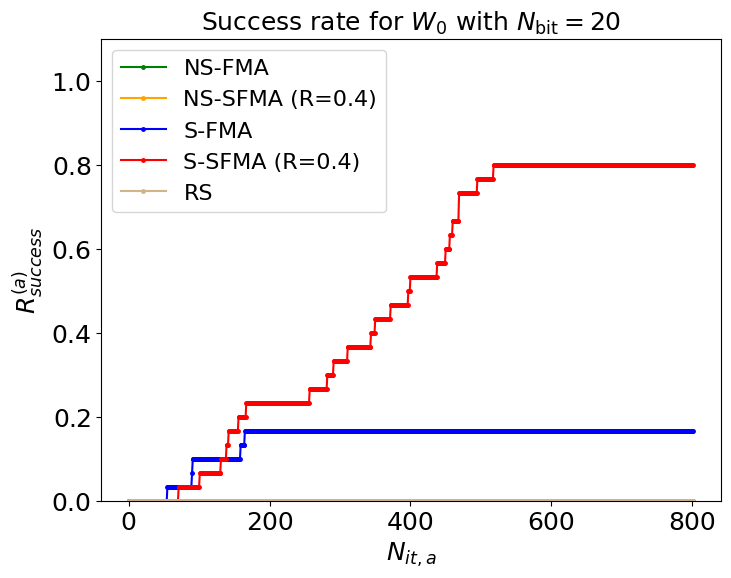

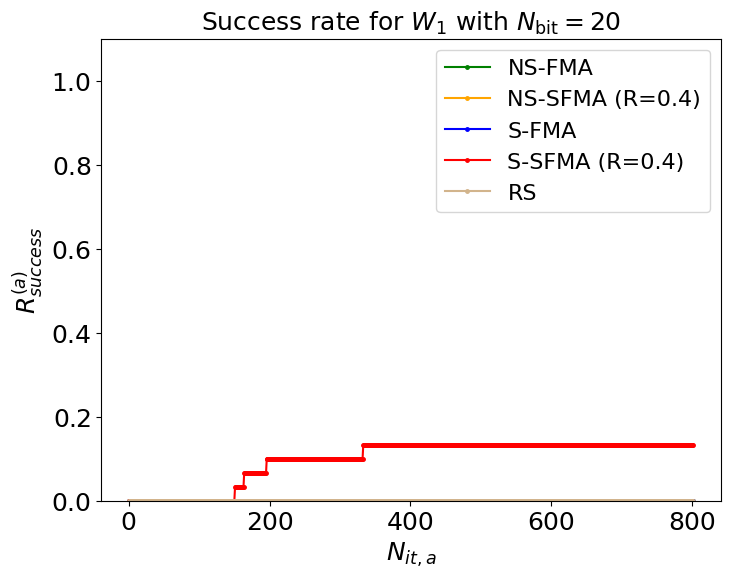

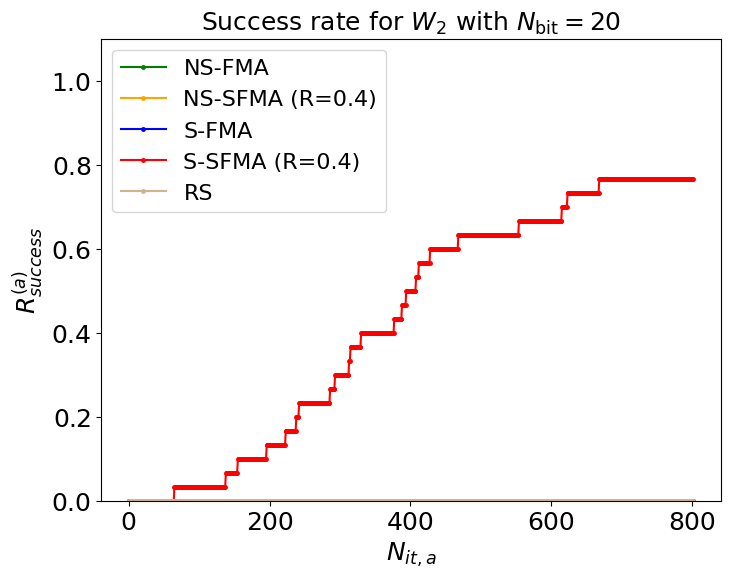

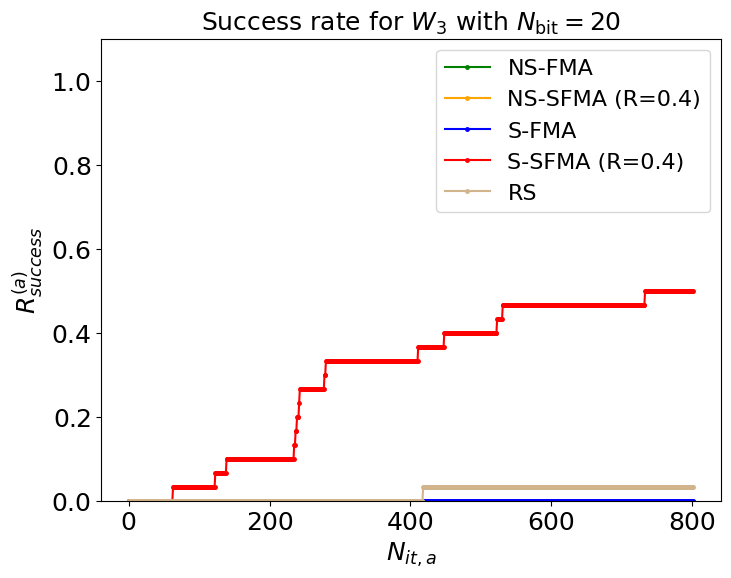

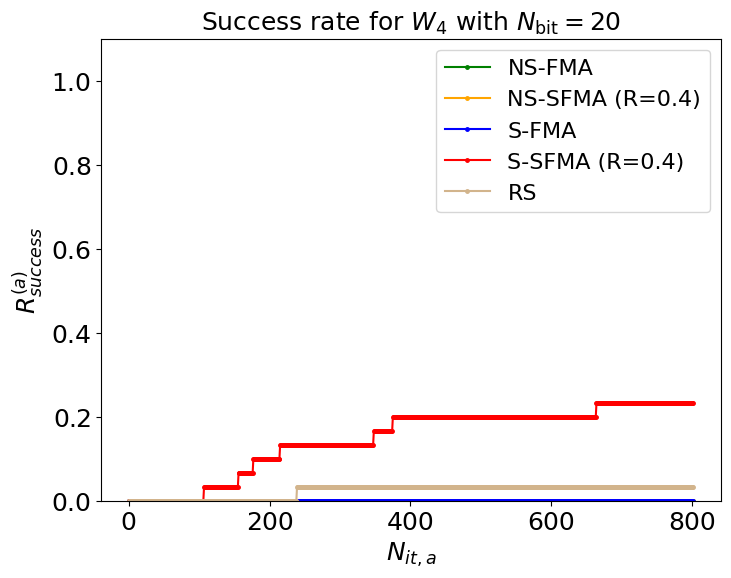

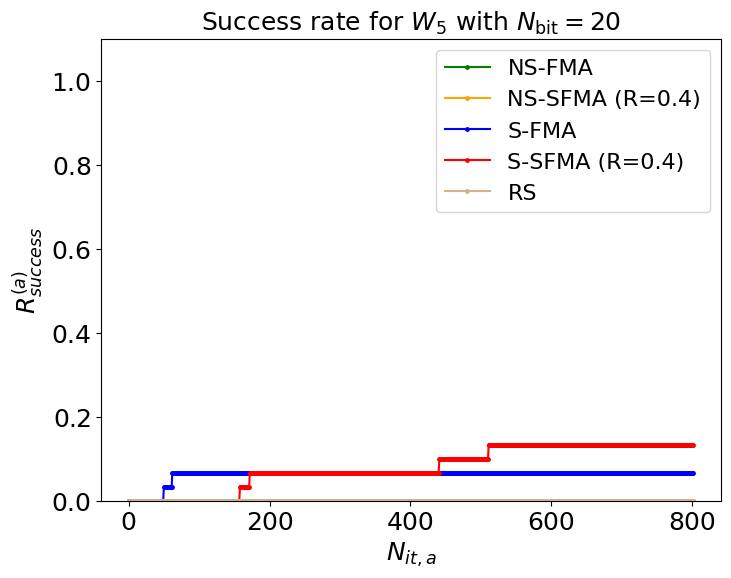

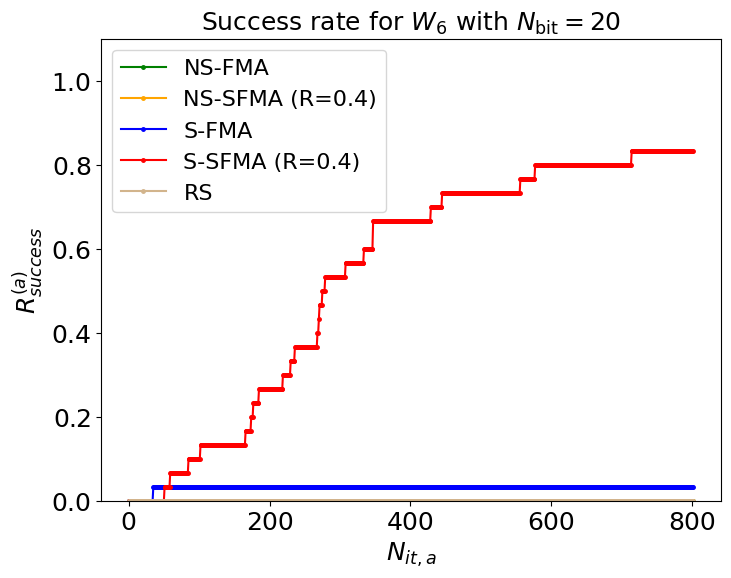

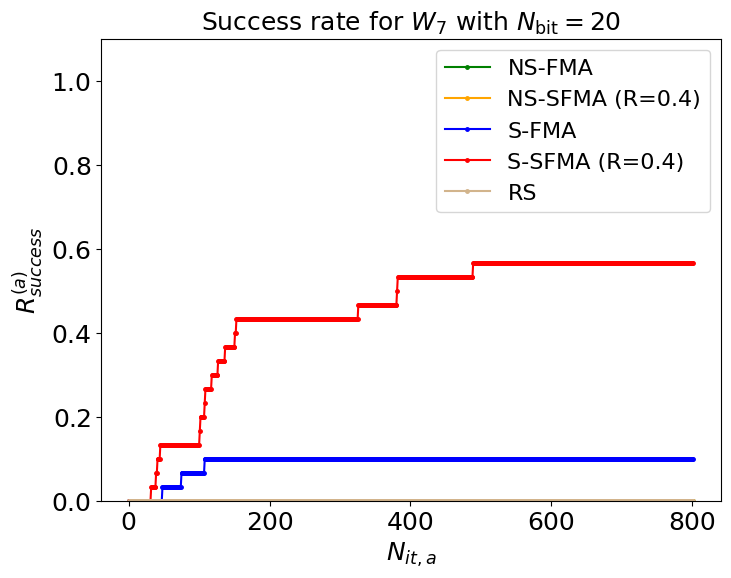

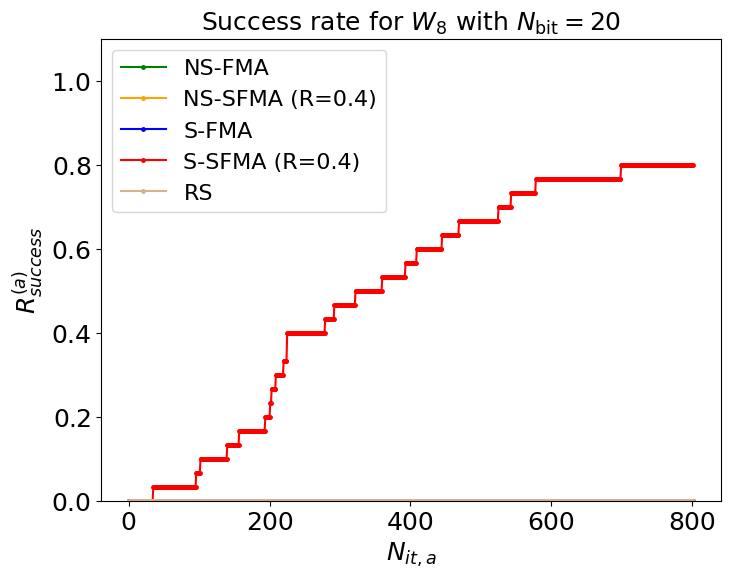

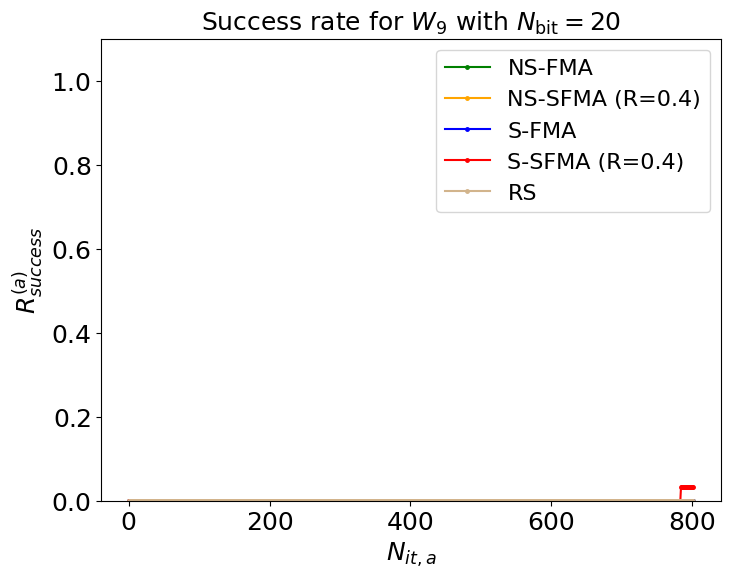

In [4]:
# Prepare lists for collecting the rates for the W Matrices.
l_rate_full_nonstandard = [] # list for rates (full, non-standardized)
l_rate_sub_nonstandard = [] # list for rates (sampled (R=0.4), non-standardized)
l_rate_full_standard = [] # list for rates (full, standardized)
l_rate_sub_standard = [] # list for rates (sampled (R=0.4), standardized)
l_rate_RS = [] # list for rates (RS)

# Load the files and plot the success rates. 
for n_W in range(d_W): # setup for each W matrix
    val_num_W = f'W_{n_W}'
    ######### Load the non-standardized results.
    file_nonstandard =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_nonstandard}.bz2'
    with open(file_nonstandard, 'rb') as fl_nonstandard:
        result_nonstandard = pickle.load(fl_nonstandard)
    ######### Load the standardized results.
    file_standard =f'{folder_data}/result_{val_num_W}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_standard}.bz2'
    with open(file_standard, 'rb') as fl_standard:
        result_standard = pickle.load(fl_standard)
    ######### Load the RS results.
    file_RS =f'{folder_data}/RS_result_{val_num_W}_{val_dim}_{val_n_tot}.bz2'
    with open(file_RS, 'rb') as fl_RS:
        result_RS = pickle.load(fl_RS)

    ######### Rounded success rates (17 decimal places)  
    rate_full_nonstandard = result_nonstandard['rate_full_rounded'] # full, non-standardized
    l_rate_full_nonstandard.append(rate_full_nonstandard) # append the rate_full_nonstandard to l_rate_full_nonstandard
    rate_sub_nonstandard = result_nonstandard['rate_sub_rounded'] # sampled (R=0.4), non-standardized
    l_rate_sub_nonstandard.append(rate_sub_nonstandard) # append the rate_sub_nonstandard to l_rate_sub_nonstandard
    rate_full_standard = result_standard['rate_full_rounded'] # full, standardized
    l_rate_full_standard.append(rate_full_standard) # append the rate_full_standard to l_rate_full_standard
    rate_sub_standard = result_standard['rate_sub_rounded'] # sampled (R=0.4), standardized
    l_rate_sub_standard.append(rate_sub_standard) # append the rate_sub_standard to l_rate_sub_standard
    rate_RS = result_RS['rate_rounded'] # RS
    l_rate_RS.append(rate_RS) # append the rate_RS to l_rate_RS
    
    #### Plot success rates.
    list_rate = [rate_full_nonstandard,rate_sub_nonstandard,rate_full_standard,rate_sub_standard,rate_RS] # list of rates
                         

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    for a in range(len(list_rate)):
        ax.plot(
        range(1, l_rate+1),
        list_rate[a],
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[a],
        color=list_color[a]
        )
    plt.ylim(0, 1.1)
    ax.set_xlabel('$N_{it,a}$', fontsize=x_fontsize)
    ax.set_ylabel('$R_{success}^{(a)} $', fontsize=y_fontsize)
    ax.set_title(rf'Success rate for $W_{n_W}$ with $N_{{\mathrm{{bit}}}} = {n_bit}$', fontsize=title_fontsize)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=legend_fontsize)

    # Create the result file and save it in the specified folder.
    
    file_path_rate = os.path.join(folder_rate, f'success_rate_{val_num_W}_{n_bit}_{val_anneal}.png') # save the figure as a png file
    os.makedirs(folder_rate, exist_ok=True) # create the folder if it doesn't exist
    fig.savefig(file_path_rate, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder



## Analyze N_conv and the final success rates 

In [5]:
# Print N_conv.
print('N_conv:')
for n_W in range(d_W):
    val_num_W = f'W_{n_W}'
    N_conv_full_nonstandard = find_min_location(l_rate_full_nonstandard[n_W], 0.5) # full, non-standardized
    N_conv_sub_nonstandard = find_min_location(l_rate_sub_nonstandard[n_W], 0.5) # sampled (R=0.4), non-standardized
    N_conv_full_standard = find_min_location(l_rate_full_standard[n_W], 0.5) # full, standardized
    N_conv_sub_standard = find_min_location(l_rate_sub_standard[n_W], 0.5) # sampled (R=0.4), standardized
    N_conv_RS = find_min_location(l_rate_RS[n_W], 0.5) # RS
    print(val_num_W,  
       list_label[3],N_conv_sub_standard,
      list_label[2], N_conv_full_standard, 
    list_label[1],N_conv_sub_nonstandard,
    list_label[0], N_conv_full_nonstandard,
       list_label[4], N_conv_RS
          )

# Print final rates.
print('final rate:')
for n_W in range(d_W):
    val_num_W = f'W_{n_W}'
    print(val_num_W,
        list_label[3],l_rate_sub_standard[n_W][l_rate-1]*n_samp,
        list_label[2],l_rate_full_standard[n_W][l_rate-1]*n_samp,
         list_label[1],l_rate_sub_nonstandard[n_W][l_rate-1]*n_samp,
         list_label[0],l_rate_full_nonstandard[n_W][l_rate-1]*n_samp,
         list_label[4],l_rate_RS[n_W][l_rate-1]*n_samp
         ) 

N_conv:
W_0 S-SFMA (R=0.4) 396 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_1 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_2 S-SFMA (R=0.4) 393 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_3 S-SFMA (R=0.4) 732 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_4 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_5 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_6 S-SFMA (R=0.4) 274 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_7 S-SFMA (R=0.4) 380 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_8 S-SFMA (R=0.4) 321 S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
W_9 S-SFMA (R=0.4) None S-FMA None NS-SFMA (R=0.4) None NS-FMA None RS None
final rate:
W_0 S-SFMA (R=0.4) 24.0 S-FMA 5.0 NS-SFMA (R=0.4) 0.0 NS-FMA 0.0 RS 0.0
W_1 S-SFMA (R=0.4) 4.0 S-FMA 0.0 NS-SFMA (R=0.4) 0.0 NS-FMA 0.0 RS 0.0
W_2 S-SFMA (R=0.4) 23.0 S-FMA 0.0 NS-SFMA (R=0.4) 0.0 NS-FMA 0.0 RS 0.0
W_3 S-SFMA 

## Plot mean with standard deviation

(821,)


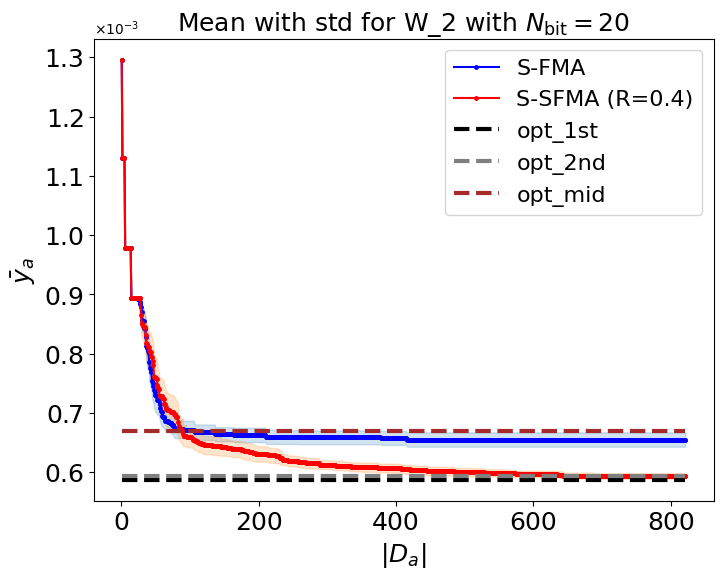

In [6]:
# Load the file for a target W matrix. 

n_W_main = 2 # the index of the target W matrix
val_number_W_main = f'W_{n_W_main}'
######### Load standardized results.
file_standard_main = f'{folder_data}/result_{val_number_W_main}_{val_dim}_{val_k}_{val_anneal}_{val_samp}_{val_n_tot}_{val_standard}.bz2'
with open(file_standard_main, 'rb') as fl_standard_main:
    result_standard_main = pickle.load(fl_standard_main)

######### Rounded means (17 decimal places) 
ys_mean_full_standard_main = result_standard_main['ys_mean_full_rounded'] # full, standardized 
ys_mean_sub_standard_main = result_standard_main['ys_mean_sub_rounded'] # sampled (R=0.4), standardized
ys_mean_difference_main = ys_mean_full_standard_main - ys_mean_sub_standard_main # difference 
opt_1st_main = result_standard_main['opt_1st_rounded'] # opt_1st
opt_2nd_main = result_standard_main['opt_2nd_rounded'] # opt_2nd 
opt_mid2_main = result_standard_main['opt_mid2_rounded'] # opt_mid2

######### Rounded stds (17 decimal places) 
CI_factor = 1.96/np.sqrt(n_samp)

ys_min_full_standard_main = result_standard_main['ensmeble_ys_min_full'] # ys_min, full, standardized 
ys_std_full_standard_main = np.round(np.std(ys_min_full_standard_main, axis=0), n_round) # std, full, standardized 
ys_UD_full_standard_main = ys_mean_full_standard_main + CI_factor*ys_std_full_standard_main # upper deviation, full, standardized 
ys_LD_full_standard_main = ys_mean_full_standard_main - CI_factor*ys_std_full_standard_main # lower deviation, full, standardized 

ys_min_sub_standard_main = result_standard_main['ensmeble_ys_min_sub'] # ys_min, sub, standardized 
ys_std_sub_standard_main = np.round(np.std(ys_min_sub_standard_main, axis=0), n_round) # std, sub, standardized 
ys_UD_sub_standard_main = ys_mean_sub_standard_main + CI_factor*ys_std_sub_standard_main # upper deviation, sub, standardized 
ys_LD_sub_standard_main = ys_mean_sub_standard_main - CI_factor*ys_std_sub_standard_main # lower deviation, sub, standardized

#print(ys_std_sub_standard_main.shape)
print(ys_std_sub_standard_main.shape)
#### Plot mean and std.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

ax.plot(range(1, n_tot+1),
        ys_mean_full_standard_main,
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[2],
        color=list_color[2]
        )
ax.plot(range(1, n_tot+1),
        ys_mean_sub_standard_main,
        marker=".",
        markersize = 5,
        linestyle="-",
        label=list_label[3],
        color=list_color[3]
        )

ax.plot(
        range(1, n_tot+1),
        opt_1st_main,
        linewidth=3,
        linestyle="--",
        label='opt_1st',
        color="black",
        )
ax.plot(
        range(1, n_tot+1),
        opt_2nd_main,
        linewidth=3,
        linestyle="--",
        label='opt_2nd',
        color="grey",
        )

ax.plot(
    range(1, n_tot+1),
    opt_mid2_main,
    linewidth=3,
    linestyle="--",
    label='opt_mid',
    color="brown",
    )

ax.fill_between(range(1, n_tot+1), ys_LD_full_standard_main, ys_UD_full_standard_main,  color='C0', alpha=.2)
ax.fill_between(range(1, n_tot+1), ys_LD_sub_standard_main, ys_UD_sub_standard_main,  color='C1', alpha=.2)

ax.set_xlabel('$|D_a|$', fontsize=x_fontsize)
ax.set_ylabel(r'$\bar{y}_a$', fontsize=y_fontsize)
ax.set_title(rf'Mean with std for {val_number_W_main} with $N_{{\mathrm{{bit}}}} = {n_bit}$', fontsize=title_fontsize)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',  axis='y',scilimits=(0,0))
ax.tick_params(labelsize=18)
ax.legend(fontsize=legend_fontsize)




# Create the result file and save it in the specified folder.
    
file_path_mean_main = os.path.join(folder_mean, f'mean_with_std_{val_number_W_main}_{n_bit}_{val_anneal}.png') # save the figure as a png file
os.makedirs(folder_mean, exist_ok=True) # create the folder if it doesn't exist
fig.savefig(file_path_mean_main, format='png', bbox_inches='tight') # save the figure as a png file in the specified folder